In [1]:
# NMRSI - Ignacio Lembo Ferrari - 29/05/2024

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from protocols import nogse
import os
import seaborn as sns
sns.set_theme(context='paper')
sns.set_style("whitegrid")

file_name = "mousebrain_20200409"
data_directory = f"C:/Users/Ignacio Lembo/Documents/data/data_{file_name}"
folder = "nogse_vs_x_colormap"
slic = 1

image_paths, method_paths = nogse.upload_NOGSE_vs_x_data(data_directory, slic)

idx = 0
rois = ["ROI1"]  # ,"ROI2","ROI3","ROI4","ROI5"

figures = []
titles = []
ims_combined = []  # Para almacenar todas las imágenes para la visualización combinada

for roi in rois:

    mask = np.loadtxt(f"rois/mask_" + str(idx + 1) + ".txt")

    T_nogse, g, xs, n, ims = nogse.colormap_nogse_vs_x_roi(image_paths, method_paths, mask, slic)

    # Create a normalization object to map the data values to the range [0, 1]
    norm = Normalize(vmin=np.nanmin(ims), vmax=np.nanmax(ims))  # Normalize(vmin=np.nanmin(ims), vmax=np.nanmax(ims))

    for x, im in zip(xs, ims):
        cmap = plt.cm.jet
        cmap.set_bad(color='black')

        fig, ax = plt.subplots(figsize=(8, 6))
        img = ax.imshow(im, cmap=cmap)  # norm = norm
        cbar = plt.colorbar(img, ax=ax, ticks=np.linspace(0, np.nanmax(im), 8))
        cbar.set_label("Señal NOGSE", fontsize=14)
        ax.axis('off')
        title = ax.set_title(f"$T_\\mathrm{{NOGSE}}$ = {T_nogse} ms || $g$ = {int(g)} mT/m || $N$ = {int(n)} || slice = {slic}", fontsize=18)

        directory = f"../results_{file_name}/{folder}/TNOGSE={T_nogse}_N={int(n)}_g={g}"
        os.makedirs(directory, exist_ok=True)

        np.savetxt(f"{directory}/{roi}_nogse_vs_x_colormap_t={T_nogse}_N={int(n)}_g={g}_x={x}.txt", im, fmt='%f')

        fig.tight_layout()
        fig.savefig(f"{directory}/{roi}_nogse_vs_x_colormap_t={T_nogse}_N={int(n)}_g={g}_x={x}.png", dpi=600)

        titles.append(title.get_text())
        plt.close(fig)

    idx += 1

No se encontraron errores en el procesamiento de las carpetas.
NOGSE parameters for the 33 experiments:

T_nogse:
 [21.5 21.5 21.5 21.5 21.5 21.5 21.5 21.5 21.5 21.5 21.5 21.5 21.5 21.5
 21.5 21.5 21.5 21.5 21.5 21.5 21.5 21.5 21.5 21.5 21.5 21.5 21.5 21.5
 21.5 21.5 21.5 21.5 21.5]
g:
 [500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500.
 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500.
 500. 500. 500. 500. 500.]
x:
 [ 0.5        0.8203125  1.140625   1.4609375  1.78125    2.1015625
  2.421875   2.7421875  3.0625     3.3828125  3.703125   4.0234375
  4.34375    4.6640625  4.984375   5.3046875  5.625      5.9453125
  6.265625   6.5859375  6.90625    7.2265625  7.546875   7.8671875
  8.1875     8.5078125  8.828125   9.1484375  9.46875    9.7890625
 10.109375  10.4296875 10.75     ]
N:
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2.]
TE:
 [55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 5

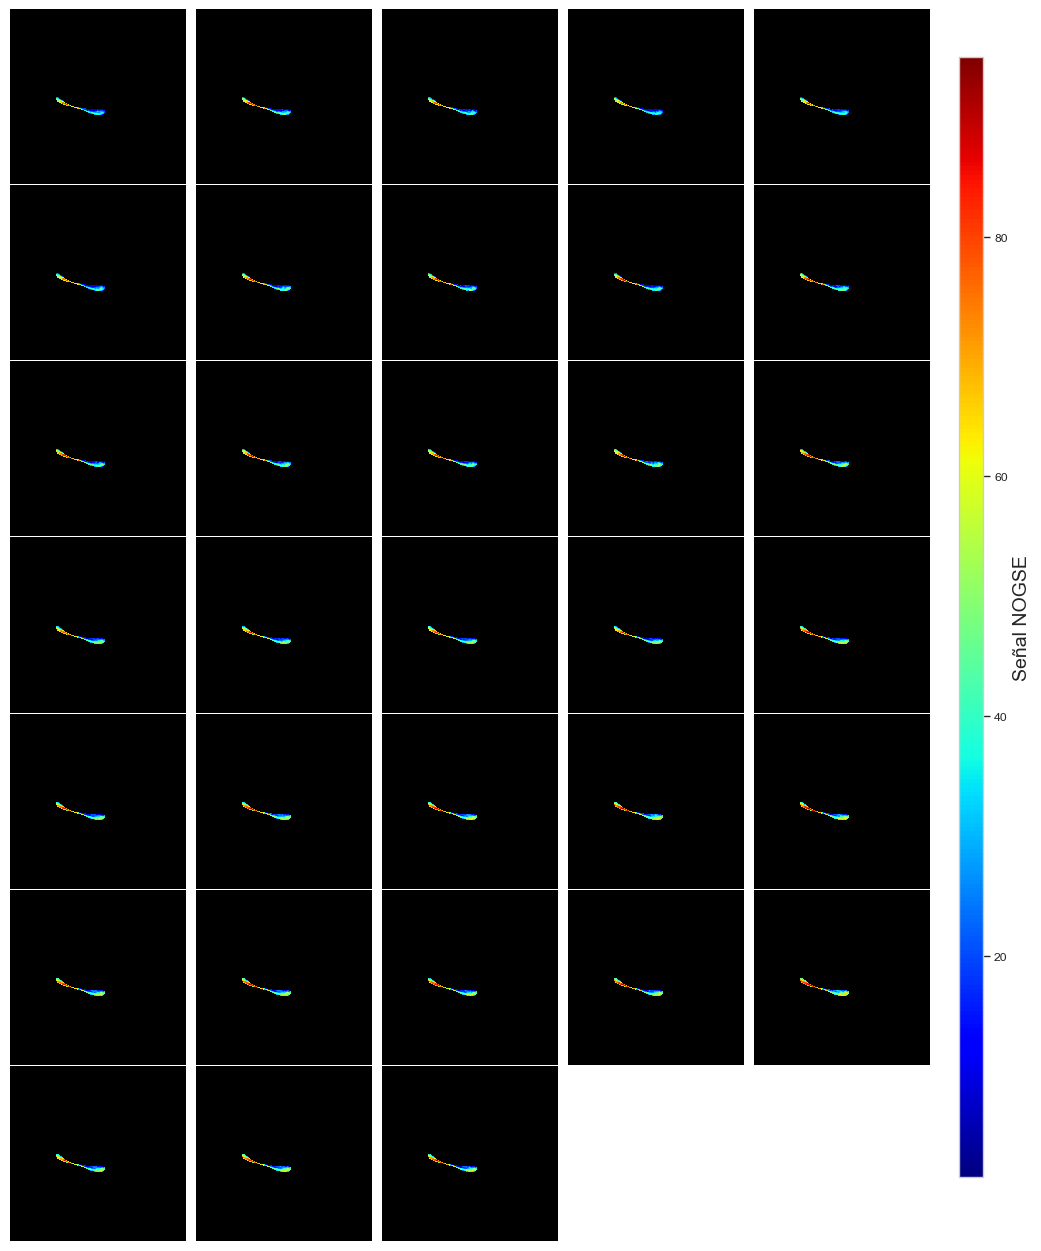

In [15]:
# Crear una imagen combinada con Matplotlib
ncols = 5  # Número de columnas en la cuadrícula
nrows = (len(ims) + ncols - 1) // ncols  # Número de filas en la cuadrícula

fig_combined, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 16))

for i, (im, ax) in enumerate(zip(ims, axes.flat)):
    cmap = plt.cm.jet
    cmap.set_bad(color='black')
    img = ax.imshow(im, cmap=cmap)
    ax.axis('off')

# Eliminar subplots vacíos
for j in range(i + 1, len(axes.flat)):
    fig_combined.delaxes(axes.flat[j])

# Añadir la barra de color compartida fuera de los subplots
cbar_ax = fig_combined.add_axes([0.92, 0.15, 0.02, 0.7])  # Posición y tamaño de la barra de color
norm = Normalize(vmin=np.nanmin(ims), vmax=np.nanmax(ims))
cbar = fig_combined.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax)
cbar.set_label("Señal NOGSE", fontsize=14)

# Ajustar para dejar espacio para la barra de color y reducir el espacio entre subplots
#fig_combined.tight_layout(rect=[0, 0, 0.9, 1])
fig_combined.subplots_adjust(wspace=0.0001, hspace=0.005)  # Ajustar los espacios entre los subplots

plt.savefig(f"{directory}/{roi}_combined_colormaps.png", dpi=600)
plt.show()